Total points for this HW: 100.
Due date: 02/20/2020 (at the start of class)

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

> Interpretability is paramount in a lot of real-world machine learning problems. Those problems were understanding the processes is as important as reaching the result.  For example, helping the city assess the risk surrounding its building stock by predicting which buildings are prone to falling. Such a problem might include looking into features such as the building age, construction type, and any symptoms the building is showing (i.e. cracking, unsymmetrical facade, …). Technical experts in the field of building restoration will need to go through these variables sequentially, answer questions pertaining to why values of these variables pose a high risk and explain the consequences of this risk to city officials that lack domain expertise before the city can make a decision to demolish a building. Therefore, the need to understand each step requires a comprehensible model that is closer to a decision tree than to a complex of trees working together. 

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

> Two examples for accuracy gaining high importance are cases exhibiting high risk or cases were interpretability is not required.

> Real-world predictions that bear high risk, are problems where accuracy is essential. Disease classification problems are ones that require high accuracy. For example, predicting the presence or absence of diabetes based on various medical/health symptoms. In disease predicting algorithms, accuracy is paramount since classifying a healthy person as sick would result in unnecessary testing, treatments, and medications. 

> Moreover, real-world problems were biases are minimal and the risk for discrimination is low are problems where interpretability is less important and random forests are a good solution. For example, a classification model that uses remotely sensed data to predict land cover. The interpretability of the process is not as important as accurately mapping the distribution of trees, grass, and water in an aerial image. 

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

> Ensemble methods that are based on learning multiple models, improve accuracy and stability at the expense of interpretability. One way of regaining some understanding of a complex ensemble method such as a random forest classier is one proposed by Pedro Domingos. Domingos’s post-processing method proposes the production of a single tree that combines the inherent comprehensibility of single trees as well as the accuracy of multiple trees ensembles. After learning a random forest classifier, the predictions generated by the latter are then fed along with the original training set to a base decision tree to train it. This intends to produce a simple tree with high accuracy.

> Moreover, reducing the number of features in a dataset using feature selection has the potential of increasing interpretability. One method of variable selection is the measure of variable importance. Put simply, variable importance permutates each variable and checks for any change in information gain after permutation. If no change occurs it means that this variable is dispensable. 

> Another possible way to gain back some interpretability is to try to find one tree in a random forest model that has the ability to predict values closest to what the whole model would predict. This could be the tree with a similar performance score as the whole model. We should be aware of the possibility of overfitting in this case.

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [1]:
import pandas as pd
import numpy as np

In [2]:
from StringIO import StringIO
thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [3]:
# your code here
print df.MPG.value_counts()
print
print 'The most common MPG value is: {}'.format(df.MPG.value_counts().argmax())

bad     15
good     5
Name: MPG, dtype: int64

The most common MPG value is: bad


In [4]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [5]:
print list(set(df.MPG))

['bad', 'good']


In [6]:
def desc_var_IG(dataframe, attributes, target):
    
    ''' a function that takes in the data, a list of attributes and the target variable. 
    the function enumerates through all the possible binary questions for each discrete-valued variable.  
    For each such split, it computes the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, 
    and compute the information gain using the previously defined InformationGain function'''
    
    # print the header for the results
    print '-' * 60
    print '{:<10s}{:>15s}{:>12s}{:>20s}'.format('Split', 'Group Y', 'Group N', 'Information Gain')
    print '-' * 60
    
    for att in attributes:
        for value in set(dataframe[att]):
            Y, N = [], []
            for index, row in dataframe.iterrows():
                if row[att] == value:
                    Y.append(index)
                else:
                    N.append(index)
                    
            goodY = len([i for i in Y if df[target][i] == list(set(df[target]))[1]]) 
            badY = len([i for i in Y if df[target][i] == list(set(df[target]))[0]])
            goodN = len([i for i in N if df[target][i] == list(set(df[target]))[1]])
            badN = len([i for i in N if df[target][i] == list(set(df[target]))[0]])
            
            print '{}={}?{:>7d}+/{}-{:>8d}+/{}-{:>14f}'.format(
                                                        att, value, goodY, badY, goodN, badN, 
                                                        InformationGain(goodY,badY,goodN,badN))

In [7]:
# all possible splits for descrete variables in the data
desc_var_IG(df, ['cylinders', 'weight'], 'MPG')

------------------------------------------------------------
Split             Group Y     Group N    Information Gain
------------------------------------------------------------
cylinders=8?      0+/5-       5+/10-      0.122556
cylinders=4?      5+/4-       0+/11-      0.365294
cylinders=6?      0+/6-       5+/9-      0.153078
weight=light?      3+/3-       2+/12-      0.097107
weight=medium?      2+/6-       3+/9-      0.000000
weight=weighty?      0+/6-       5+/9-      0.153078


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [8]:
def real_var_IG(dataframe, attributes, target):
    
    ''' a function that takes in the data, a list of attributes and the target variable. 
    the function enumerates through all the possible binary questions for each real-valued variable.  
    For each such split, it computes the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, 
    and compute the information gain using the previously defined InformationGain function'''
    
    # sort the values of the attributes and create a list of midpoints
    for att in attributes:
        att_sorted = list(dataframe[att].sort_values())
        print '%s_sorted ='%(att), att_sorted
        
        att_sorted_mid = [(a+b)/2 for a, b in zip(att_sorted[::2], att_sorted[1::2])]
        print '%s_sorted_mid ='%(att), att_sorted_mid

        
    # print the header for the results
    print '-' * 60
    print '{:<5s}{:>13s}{:>12s}{:>20s}'.format('Split', 'Group Y', 'Group N', 'Information Gain')
    print '-' * 60
    

    for value in att_sorted_mid:
        Y, N = [], []
        for index, row in dataframe.iterrows():
            if row[att] > value:
                Y.append(index)
            else:
                N.append(index)

        goodY = len([i for i in Y if dataframe[target][i] == list(set(dataframe[target]))[1]]) 
        badY = len([i for i in Y if dataframe[target][i] == list(set(dataframe[target]))[0]])
        goodN = len([i for i in N if dataframe[target][i] == list(set(dataframe[target]))[1]])
        badN = len([i for i in N if dataframe[target][i] == list(set(dataframe[target]))[0]])

        print '{}>{}?{:>7d}+/{}-{:>8d}+/{}-{:>14f}'.format(
                                                    att, value, goodY, badY, goodN, badN, 
                                                    InformationGain(goodY,badY,goodN,badN))

In [9]:
# all possible splits for real variables in the data
real_var_IG(df, ['HP'], 'MPG')

HP_sorted = [65, 75, 81, 85, 89, 90, 92, 93, 94, 95, 95, 95, 100, 100, 110, 139, 145, 170, 175, 190]
HP_sorted_mid = [70, 83, 89, 92, 94, 95, 100, 124, 157, 182]
------------------------------------------------------------
Split      Group Y     Group N    Information Gain
------------------------------------------------------------
HP>70?      4+/15-       1+/0-      0.105915
HP>83?      2+/15-       3+/0-      0.367103
HP>89?      1+/14-       4+/1-      0.365777
HP>92?      0+/13-       5+/2-      0.509186
HP>94?      0+/11-       5+/4-      0.365294
HP>95?      0+/8-       5+/7-      0.223357
HP>100?      0+/6-       5+/9-      0.153078
HP>124?      0+/5-       5+/10-      0.122556
HP>157?      0+/3-       5+/12-      0.068394
HP>182?      0+/1-       5+/14-      0.021377


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

> The optimal binary split of the data is on the value '92' of the attribute 'HP' because it resulted in the highest information gain of 0.509186.

> All the instances with HP value greater than ‘92’ belong to the same class (13 bad instances in this case). Therefore, there is no need to split further and we can declare this node as a leaf. However, the instances with horse power less than or equal to 92 still include both classes (5 good and 2 bad cars). Therefore, this node will require further splitting.

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [10]:
# subset the data to get on the values with HP less than or equal to 92
df_sub_1 = df[df['HP'] <= 92]
df_sub_1

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
11,good,4,92,medium
14,good,4,89,medium
15,good,4,65,light
16,bad,6,85,medium
17,good,4,81,light


### Discrete values

In [11]:
# all possible splits for descrete variables in the subset data
desc_var_IG(df_sub_1, ['cylinders', 'weight'], 'MPG')

------------------------------------------------------------
Split             Group Y     Group N    Information Gain
------------------------------------------------------------
cylinders=4?      5+/0-       0+/2-      0.863121
cylinders=6?      0+/2-       5+/0-      0.863121
weight=light?      3+/0-       2+/2-      0.291692
weight=medium?      2+/2-       3+/0-      0.291692


### Real-valued attribute HP

In [12]:
# all possible splits for real variables in the subset data
real_var_IG(df_sub_1, ['HP'], 'MPG')

HP_sorted = [65, 75, 81, 85, 89, 90, 92]
HP_sorted_mid = [70, 83, 89]
------------------------------------------------------------
Split      Group Y     Group N    Information Gain
------------------------------------------------------------
HP>70?      4+/2-       1+/0-      0.076010
HP>83?      2+/2-       3+/0-      0.291692
HP>89?      1+/1-       4+/1-      0.061743


### Result
>Further splitting the data using the value ‘4’ of the attribute 'cylinder' that resulted in the highest information gain will result in two groups each with only one class (good cars are in one group and bad cars are in the other). Therefore, there is no need to split further.

f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

**Please make sure you dowloaded the image (tree.jpg) and have it in the same directory with this notebook to be able to view the image below.**
![alt text](tree.jpg)

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

> good,4,70,light

> bad,6,113,medium

> bad,6,83,weighty

> bad,4,95,weighty


### Question 3, Predicting burden of disease （40 pts)

In [13]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 16 columns):
Country                     130 non-null object
FrxnPeaceIn10               130 non-null float64
ODA4H2OPcptaDol             130 non-null float64
RenewResm3PcptaYr           130 non-null int64
SustAccImprWatRur           130 non-null float64
SustAccImprWatUrb           130 non-null float64
SustAccImprSanRur           130 non-null float64
SustAccImprSanUrb           130 non-null float64
TotHlthExpPctofGDP          130 non-null float64
GenGovtPctofTotHlthExp      130 non-null float64
ExtResHlthPctTotExpHlth     130 non-null float64
PCptaGovtExpHlthAvgExcRt    130 non-null int64
GDPPCptaIntDol              130 non-null int64
AdultLtrcyRate              130 non-null float64
FemaleLtrcyRate             130 non-null float64
BurdenOfDisease             130 non-null object
dtypes: float64(11), int64(3), object(2)
memory usage: 16.3+ KB


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# your code here

# create the features space and the target variable
X = data.iloc[:, 1:-1]
y = data[['BurdenOfDisease']]

# split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   stratify=y,
                                                   random_state=1)

# instantiate a decision tree, fit, predict and evaluate accuracy
accuracy = []
for i in range(1,11):
    dt = DecisionTreeClassifier(max_depth=i, random_state=1)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    print 'Decision tree with maximum depth {} has an accuracy score of {}'.format(i, acc)
    

Decision tree with maximum depth 1 has an accuracy score of 0.423076923077
Decision tree with maximum depth 2 has an accuracy score of 0.538461538462
Decision tree with maximum depth 3 has an accuracy score of 0.615384615385
Decision tree with maximum depth 4 has an accuracy score of 0.576923076923
Decision tree with maximum depth 5 has an accuracy score of 0.576923076923
Decision tree with maximum depth 6 has an accuracy score of 0.461538461538
Decision tree with maximum depth 7 has an accuracy score of 0.538461538462
Decision tree with maximum depth 8 has an accuracy score of 0.538461538462
Decision tree with maximum depth 9 has an accuracy score of 0.538461538462
Decision tree with maximum depth 10 has an accuracy score of 0.538461538462


b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

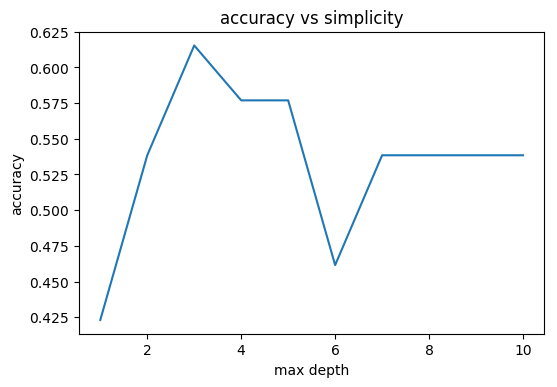

The figure shows how the accuracy of a decision tree classifier changes when changing the maximum depth of the tree.
The accuracy increased with depth to reach maximum accuracy of 0.615 at max depth 3.
After that,the accuracy starts decreasing which is a sign of the model overfitting the training data to reach 
a minumum at maximum depth of 6. 


In [16]:
import matplotlib.pylab as plt
%matplotlib inline  

# your code here

depth = range(1,11)
plt.figure(dpi=100)
plt.plot(depth, accuracy)
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('accuracy vs simplicity')
plt.show()

print 'The figure shows how the accuracy of a decision tree classifier changes when changing the maximum depth of the tree.\
\nThe accuracy increased with depth to reach maximum accuracy of 0.615 at max depth 3.\nAfter that,\
the accuracy starts decreasing which is a sign of the model overfitting the training data to reach \
\na minumum at maximum depth of 6. '

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [17]:
from sklearn.model_selection import GridSearchCV

# your code here

# instantiate a decision tree classifier
dt = DecisionTreeClassifier(random_state=1)

# define the hyperparameter space
params_dt = {'max_depth': depth}

# instantiate a 10-fold CV grid search
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt,
                      scoring='accuracy', cv=10)

# fit on the training data
grid_dt.fit(X_train, y_train.values.ravel())

# extract best hyperparameter
best_hyperparameter = grid_dt.best_params_
print 'Best hyperparameter:', best_hyperparameter

# extract best cv score 
best_cv_score = grid_dt.best_score_
print 'Best CV accuracy:', best_cv_score

# extract best model
best_model = grid_dt.best_estimator_

# evaluate on out of sample
out_of_sample_acc = best_model.score(X_test, y_test)
print 'Out of sample accuracy:', out_of_sample_acc

Best hyperparameter: {'max_depth': 8}
Best CV accuracy: 0.615384615385
Out of sample accuracy: 0.538461538462


In [18]:
y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.53846153846153844

In [19]:
pd.DataFrame(grid_dt.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001400,0.000401,0.490385,0.500000,1,{u'max_depth': 1},10,0.500000,0.500000,0.500000,...,0.500,0.500000,0.500,0.500000,0.500,0.500000,0.000186,0.000042,0.026624,0.000000
1,0.001404,0.000369,0.576923,0.750951,2,{u'max_depth': 2},9,0.500000,0.760870,0.583333,...,0.500,0.770833,0.500,0.770833,0.750,0.750000,0.000036,0.000005,0.123761,0.017590
2,0.001505,0.000373,0.596154,0.832563,3,{u'max_depth': 3},3,0.666667,0.847826,0.583333,...,0.500,0.843750,0.500,0.843750,0.750,0.822917,0.000038,0.000006,0.101911,0.033115
3,0.001573,0.000376,0.596154,0.911549,4,{u'max_depth': 4},3,0.416667,0.934783,0.583333,...,0.500,0.937500,0.625,0.906250,0.750,0.875000,0.000051,0.000008,0.118286,0.022213
4,0.001650,0.000372,0.586538,0.961549,5,{u'max_depth': 5},8,0.333333,0.967391,0.583333,...,0.625,0.989583,0.500,0.968750,0.625,0.927083,0.000067,0.000004,0.146141,0.020260
5,0.001654,0.000371,0.596154,0.979574,6,{u'max_depth': 6},3,0.333333,0.989130,0.583333,...,0.625,1.000000,0.625,0.989583,0.750,0.979167,0.000039,0.000002,0.153646,0.014964
6,0.010972,0.000386,0.605769,0.990263,7,{u'max_depth': 7},2,0.333333,1.000000,0.666667,...,0.625,1.000000,0.625,1.000000,0.750,0.989583,0.027909,0.000031,0.155143,0.011345
7,0.001659,0.000374,0.615385,0.995652,8,{u'max_depth': 8},1,0.333333,1.000000,0.583333,...,0.625,1.000000,0.625,1.000000,0.750,1.000000,0.000028,0.000005,0.150811,0.008696
8,0.001663,0.000372,0.596154,0.998913,9,{u'max_depth': 9},3,0.333333,1.000000,0.583333,...,0.625,1.000000,0.625,1.000000,0.750,1.000000,0.000038,0.000004,0.173255,0.003261
9,0.001661,0.000372,0.596154,1.000000,10,{u'max_depth': 10},3,0.333333,1.000000,0.583333,...,0.625,1.000000,0.625,1.000000,0.750,1.000000,0.000034,0.000005,0.173255,0.000000


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [20]:
from sklearn import tree

# your code here
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print thestring

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="GDPPCptaIntDol <= 2978.5, samples = 104, value = [26, 26, 26, 26], class = awful", fillcolor="#e5813900"] ;
1 [label="SustAccImprSanUrb <= 0.6634, samples = 46, value = [26, 19, 0, 1], class = awful", fillcolor="#e5813942"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 32, value = [25, 7, 0, 0], class = awful", fillcolor="#e58139b8"] ;
1 -> 2 ;
3 [label="samples = 14, value = [1, 12, 0, 1], class = high", fillcolor="#47e539d8"] ;
1 -> 3 ;
4 [label="GDPPCptaIntDol <= 9195.0, samples = 58, value = [0, 7, 26, 25], class = low", fillcolor="#399de508"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 40, value = [0, 7, 9, 24], class = medium", fillcolor="#d739e57b"] ;
4 -> 5 ;
6 [label="samples = 18, value = [0, 0, 17, 1], class = low", fillcolor="#399de5f0"] ;
4 -> 6 ;
}


**Please make sure you dowloaded the image (tree2.jpg) and have it in the same directory with this notebook to be able to view the image below.**
![alt text](tree2.jpg)

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# your code here

# instantiate a random forest classifier
rf = RandomForestClassifier(random_state=1)

In [22]:
# check the random forest's hyperparamters
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [23]:
# define a grid of hyperparameters to tune on
params_rf = {'n_estimators':range(20, 80, 10),
            'max_depth': depth,
            'min_samples_leaf': [0.1, 0.2],
            'max_features': ['log2', 'sqrt']}

# instantiate a grid search
grid_rf = GridSearchCV(estimator=rf,
                      param_grid=params_rf,
                      cv=3,
                      scoring='accuracy',
                      n_jobs=-1)

# fit grid_rf to the training data
grid_rf.fit(X_train, y_train.values.ravel())

# extract the best hyperparameters
best_hyperparams = grid_rf.best_params_
print 'Best hyperparams:\n', best_hyperparams

Best hyperparams:
{'max_features': 'log2', 'n_estimators': 20, 'max_depth': 2, 'min_samples_leaf': 0.1}


In [24]:
# extract the best model
best_model = grid_rf.best_estimator_

# evaluate out of sample accuracy
out_of_sample_acc = best_model.score(X_test, y_test)
print 'Out of sample accuracy:', out_of_sample_acc

Out of sample accuracy: 0.576923076923


**The model performance slightly enhanced when we used random forests.**

b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

**Using a random forest algorithm to predict the burden of diarrheal illness resulted in a slightly better performing model (with an accuracy of 0.58) than a decision tree algorithm (with an accuracy of 0.54). The random forest was based on 20 estimators/trees versus one tree in a decision tree model. The use of multiple trees makes the random forest less interpretable yet a bit more accurate. However, given this slight increase in accuracy, one must asses the nature of the problem in hand and decide if accuracy is more important than interpretability. In medical applications, even a slight increase in accuracy may outweigh the benefits of explanation.**